In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models
import keras.backend as K
import keras
from keras.models import Sequential
from keras.layers import Conv1D, Convolution1D, MaxPooling1D, ZeroPadding1D, BatchNormalization, Activation
from keras.utils import to_categorical 
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import timeit
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')
import sys
from keras.regularizers import l2
import kerastuner as kt

In [3]:
csvFile = pd.read_csv("C:/Users/Dell/Downloads/SY_NG/Data/Myfile_dataA_5000.csv")

In [4]:
csvFile.shape

(5328, 9)

In [5]:
csvFile = csvFile.dropna()

In [6]:
csvFile.isna().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [7]:
csvFile.head()

Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  \
0  1.217760e-08       4.606941       1.090580e-08     1.352640e-09   
1  1.899270e-08       4.492014       1.087040e-08     1.360770e-09   
2  1.084500e-08       4.331288       1.020380e-08     1.093760e-09   
3  1.341160e-08       4.081299       1.006170e-08     1.204350e-09   
4  1.439060e-08       4.254729       1.082500e-08     1.780270e-09   

      SD_doping  SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  Drain Current  
0  3.699440e+20      1.126280e+17      0.078664       0.216504   2.070000e-12  
1  4.060340e+20      2.214310e+17      0.496761       0.591274   2.120000e-12  
2  6.654640e+20      2.655100e+17      0.185672       0.798587   2.160000e-12  
3  4.815560e+20      2.492070e+17      0.166393       0.878277   2.210000e-12  
4  6.530570e+20      2.630330e+17      0.764250       0.111511   2.260000e-12

In [8]:
from sklearn.preprocessing import MinMaxScaler

num_features = ["Gate_Length", "Work_function",	"Channel_Thickness", "Oxide_Thickness",	"SD_doping", "SUBSTRATE_doping", "Gate_Voltage",
                "Drain_Voltage", "Drain Current"]

X = csvFile[num_features]

# Normalize data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X)

# Create a DataFrame for normalized data
csvFile_normalized = pd.DataFrame(X_normalized, columns=num_features)

In [9]:
csvFile_normalized.head()

Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  SD_doping  \
0     0.181381       0.404569           0.905891         0.352655   0.363524   
1     0.749377       0.327927           0.870487         0.360787   0.399984   
2     0.070317       0.220743           0.203820         0.093712   0.662072   
3     0.284227       0.054031           0.061706         0.204329   0.476280   
4     0.365821       0.169687           0.825083         0.780387   0.649537   

   SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  Drain Current  
0          0.063083      0.078615       0.216492   0.000000e+00  
1          0.607169      0.496818       0.591275   1.655630e-08  
2          0.827593      0.185651       0.798594   2.980134e-08  
3          0.746067      0.166367       0.878286   4.635765e-08  
4          0.815206      0.764376       0.111496   6.291395e-08

In [10]:
csvFile_normalized.isnull().sum()

Gate_Length          0
Work_function        0
Channel_Thickness    0
Oxide_Thickness      0
SD_doping            0
SUBSTRATE_doping     0
Gate_Voltage         0
Drain_Voltage        0
Drain Current        0
dtype: int64

In [11]:
csvFiley = pd.DataFrame(csvFile_normalized['Drain Current'],)
print(csvFiley.shape)
csvFiley.head()

(5000, 1)


Drain Current
0   0.000000e+00
1   1.655630e-08
2   2.980134e-08
3   4.635765e-08
4   6.291395e-08

In [12]:
csvFilex = csvFile_normalized.drop('Drain Current', axis = 1)
print(csvFilex.shape)
csvFilex.head()

(5000, 8)


Gate_Length  Work_function  Channel_Thickness  Oxide_Thickness  SD_doping  \
0     0.181381       0.404569           0.905891         0.352655   0.363524   
1     0.749377       0.327927           0.870487         0.360787   0.399984   
2     0.070317       0.220743           0.203820         0.093712   0.662072   
3     0.284227       0.054031           0.061706         0.204329   0.476280   
4     0.365821       0.169687           0.825083         0.780387   0.649537   

   SUBSTRATE_doping  Gate_Voltage  Drain_Voltage  
0          0.063083      0.078615       0.216492  
1          0.607169      0.496818       0.591275  
2          0.827593      0.185651       0.798594  
3          0.746067      0.166367       0.878286  
4          0.815206      0.764376       0.111496

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# x_scaler = MinMaxScaler(feature_range=(0,1))
# y_scaler = MinMaxScaler(feature_range=(0,1))
# x_scaled = x_scaler.fit_transform(csvFilex[:,:])
# y_scaled = y_scaler.fit_transform(csvFiley.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(csvFilex, csvFiley, test_size = 0.15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.30)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2975, 8) (2975, 1)
(1275, 8) (1275, 1)
(750, 8) (750, 1)


### Model: Random Forest Regressor

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train_scaled, y_train)

y_pred_rfr = RFR.predict(x_test_scaled)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('R2_Score:', metrics.r2_score(y_test, y_pred_rfr))

Mean Absolute Error: 0.1639792727883469
Mean Squared Error: 0.05657040865981906
Root Mean Squared Error: 0.23784534609661603
R2_Score: -0.07945012907087401


In [16]:
# Hyperparameter tuning (using GridSearchCV)

param_grid = {
    'n_estimators': [5, 10, 20, 30, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RFR, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    n_jobs=-1  # Use all available cores
)

grid_search.fit(x_train_scaled, y_train)

# Best model from Grid Search
best_rfr = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rfr.predict(x_test_scaled)
print('R2_Score after Grid Search:', metrics.r2_score(y_test, y_pred_best))

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
R2_Score after Grid Search: -0.031532546842021114


In [17]:
import time

num_inferences = 100
X_test_tensor = tf.convert_to_tensor(x_test)

start_time = time.time()

for _ in range(num_inferences):
    predictions = RFR.predict(X_test_tensor)

end_time = time.time()

average_inference_time = (end_time - start_time) / num_inferences
print(f"Average inference time for ML model: {average_inference_time:.6f} seconds")

Average inference time for ML model: 0.013644 seconds


### SHAP

In [31]:
import shap

In [33]:
explainer = shap.Explainer(RFR.predict, x_train)

In [34]:
shap_values = explainer(x_test)

ExactExplainer explainer: 751it [03:38,  3.30it/s]                         


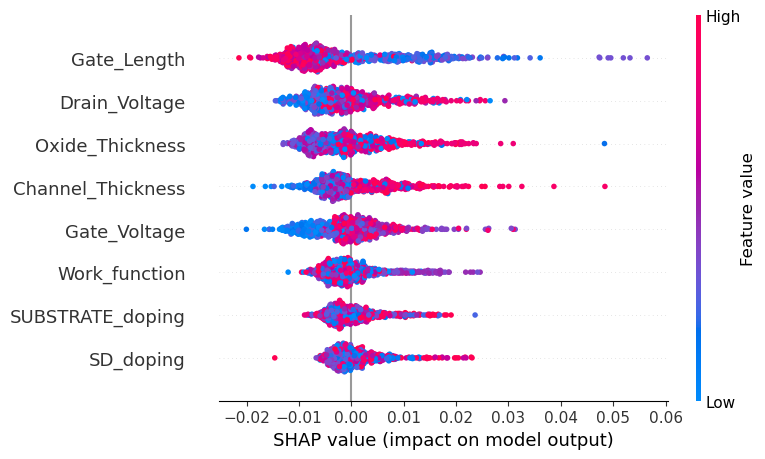

In [35]:
# Summary plot of feature importance
shap.summary_plot(shap_values, x_test, show=False)
plt.savefig("RF_shap_summary_plot.png", dpi=300, bbox_inches='tight')

In [36]:
shap_values.shape

(750, 8)

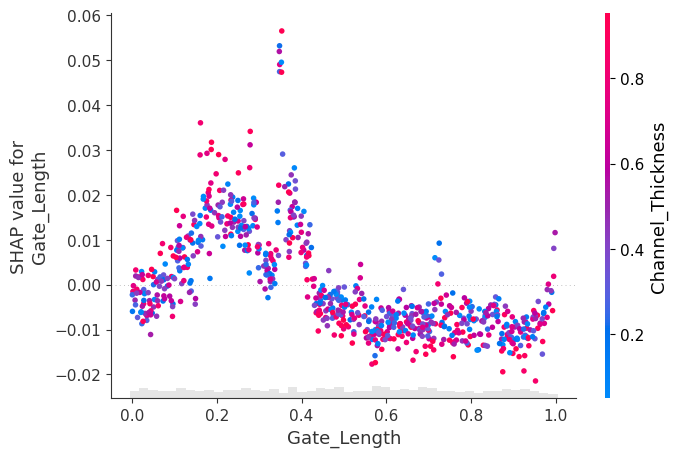

In [37]:
shap.plots.scatter(shap_values[:, 0], color=shap_values, show=False)
plt.savefig("RF_shap_scatter_plot_1.png", dpi=300, bbox_inches='tight')

In [38]:
shap.plots.waterfall(shap_values[749], show=False)
plt.savefig("RF_shap_waterfall_plot.png", dpi=300, bbox_inches='tight')

In [39]:
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("RF_shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')

In [40]:
sample_ind = 1000
shap.partial_dependence_plot("Work_function", RFR.predict, x_test, model_expected_value=True, feature_expected_value=True, ice=False,
                             shap_values=shap_values[sample_ind : sample_ind + 1, :],)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### SHAP with csvFilex

ExactExplainer explainer: 5001it [23:42,  3.50it/s]                          


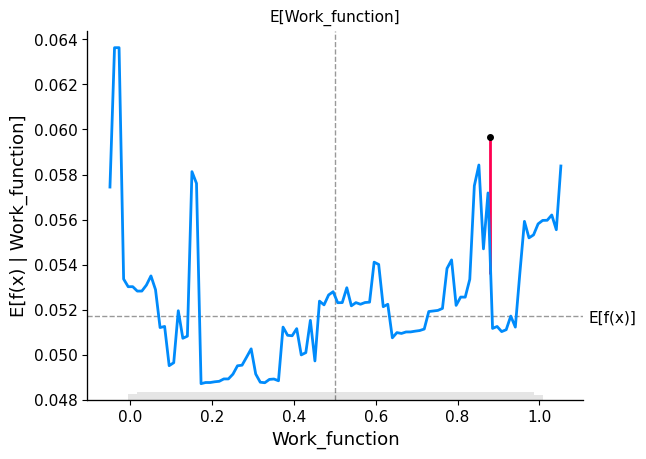

In [32]:
explainer_reg = shap.Explainer(RFR.predict, csvFilex)
shap_values_reg = explainer_reg(csvFilex)

# make a standard partial dependence plot
sample_ind = 1000
shap.partial_dependence_plot(
    "Work_function",
    RFR.predict,
    csvFilex,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values_reg[sample_ind : sample_ind + 1, :],
)

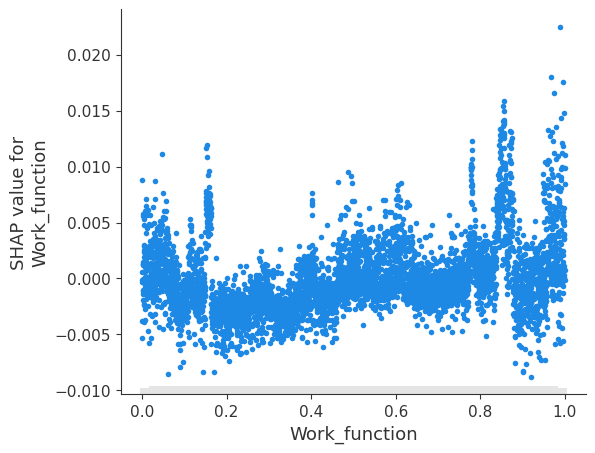

In [33]:
shap.plots.scatter(shap_values_reg[:, "Work_function"])

In [34]:
print(shap_values_reg.shape)

(5000, 8)


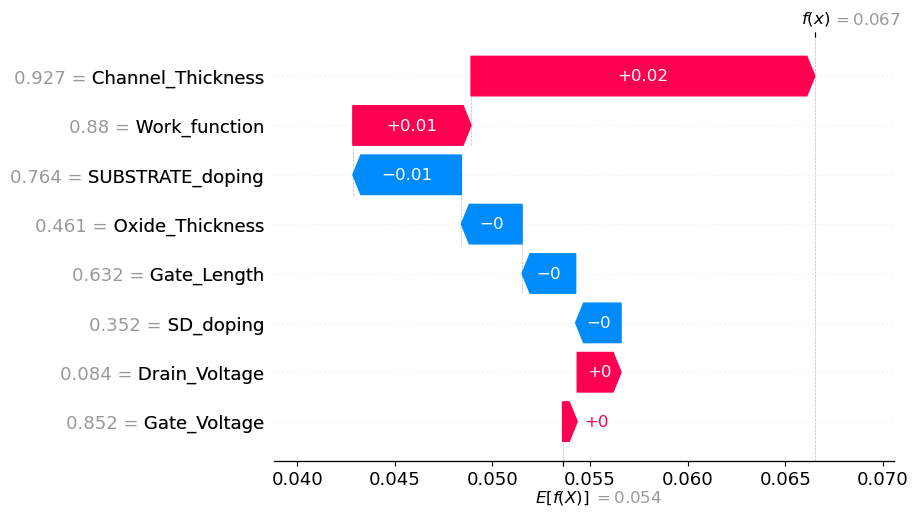

In [35]:
shap.plots.waterfall(shap_values_reg[sample_ind])

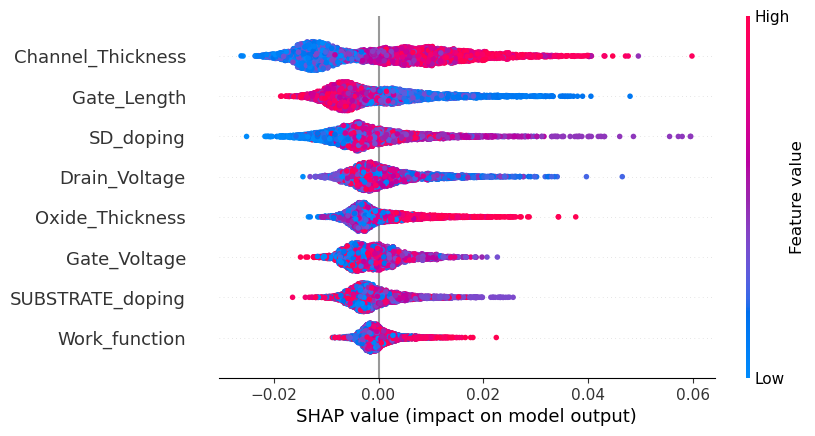

In [36]:
shap.plots.beeswarm(shap_values_reg)

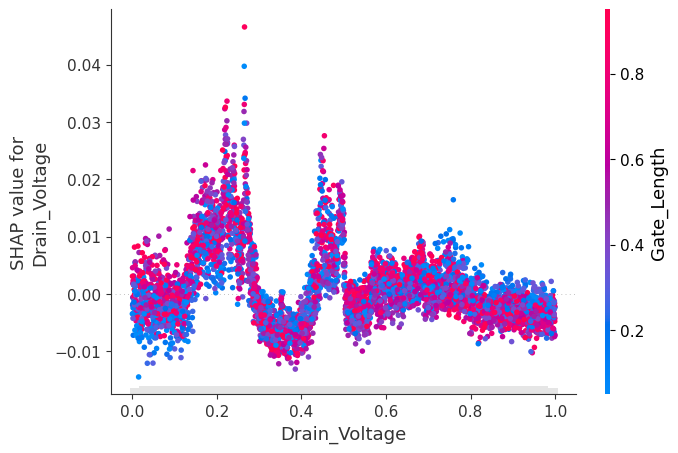

In [37]:
shap.plots.scatter(shap_values_reg[:, "Drain_Voltage"], color=shap_values_reg)

In [38]:
explainer = shap.KernelExplainer(model=RFR.predict, data=x_train, link="identity")
shap_values = explainer.shap_values(x_test, nsamples=100)

Using 2975 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/750 [00:00<?, ?it/s]

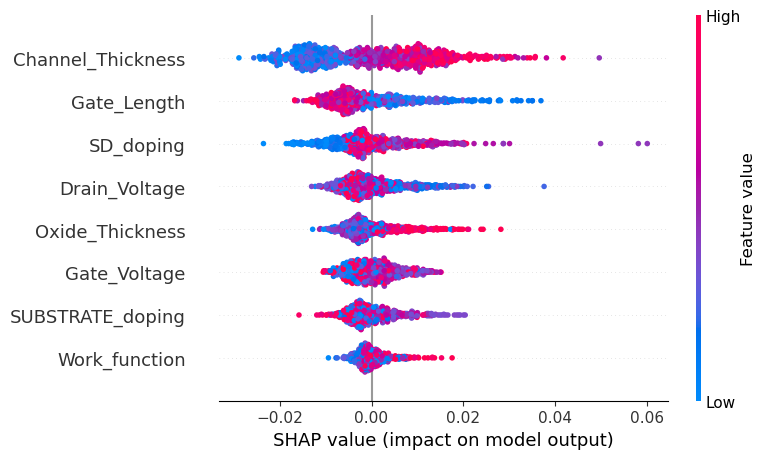

In [39]:
shap.summary_plot(shap_values, x_test)

### LIME

In [47]:
import lime
from lime import lime_tabular

In [49]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(x_train), feature_names=x_train.columns, mode='regression')

In [51]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns.values.tolist(), class_names=['MEDV'], 
                                                   verbose=True, mode='regression')

In [53]:
j = 5
exp = explainer.explain_instance(x_test.values[j], RFR.predict, num_features=6)

Intercept 0.06178905010818319
Prediction_local [0.03171144]
Right: 0.08116926042065202


In [55]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("RF_lime_explanation_plot_1.png", dpi=300, bbox_inches='tight')

In [57]:
exp.as_list()

[('0.51 < Gate_Length <= 0.76', -0.01018502888413898),
 ('Gate_Voltage <= 0.25', -0.009128458627206546),
 ('0.25 < Oxide_Thickness <= 0.49', -0.006869457262370036),
 ('Channel_Thickness <= 0.25', -0.004110110480155415),
 ('0.26 < Work_function <= 0.51', 0.004004581913113564),
 ('Drain_Voltage <= 0.25', -0.0037891363214020896)]

In [59]:
j = 5
exp = explainer.explain_instance(x_test.values[j], RFR.predict, num_features=6)

Intercept 0.0628512390151969
Prediction_local [0.03211491]
Right: 0.08116926042065202


In [61]:
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
fig.savefig("RF_lime_explanation_plot_1.png", dpi=300, bbox_inches='tight')

In [63]:
exp.as_list()

[('0.51 < Gate_Length <= 0.76', -0.010077029656577446),
 ('Gate_Voltage <= 0.25', -0.009422780379706829),
 ('0.25 < Oxide_Thickness <= 0.49', -0.007745056205411503),
 ('0.26 < Work_function <= 0.51', 0.004628798958956303),
 ('Channel_Thickness <= 0.25', -0.004485996985360801),
 ('Drain_Voltage <= 0.25', -0.003634268920792041)]